In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Data Preprocessing and Exploration
- by exploring the data later we got to know that a nan vaue represented by " ?" is present in the data.y

In [2]:
income_data = pd.read_csv("./Dataset/adult.data", 
                          names = ['age', 'work_class', 'fn', 'education','education_num', 'marital_status',
                                   'occupation', 'relationship', 'race', 'gender', 'capital_gain',
                                   'capital_loss','hours_per_week', 'native_country', 'salary'],
                          na_values = [' ?']
                        )
income_data.shape

(32561, 15)

In [3]:
data = income_data.copy()

In [4]:
data.head()

,age,work_class,fn,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
work_class        30725 non-null object
fn                32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    31978 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# checking for missing value
data.isna().sum()

age                  0
work_class        1836
fn                   0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
salary               0
dtype: int64

In [7]:
# checking any relation between data
missing = data[data.isnull().any(axis = 1)]
missing.head(15)

,age,work_class,fn,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K


1. Missing value in work_class = 1836
2. Missing value in occupation in occupation = 1843

- there are 1836 rows where two specific columns (occupation and work_class) have missing value
- 1843-1836 = 7 these 7 rows has work_class Never-worked so occupation can not be known

- also there are missing values in Country = 583
- as far as city is concerned we are going to fill it with mode

we are going to drop the rows with missing value as their numbers are very less as compared to total traingin data

In [8]:
data.native_country.fillna(data.native_country.value_counts().index[0], inplace = True)
data.head()

,age,work_class,fn,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
data.isna().sum()

age                  0
work_class        1836
fn                   0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [10]:
data2 = data.dropna(axis = 0)
data2.shape

(30718, 15)

In [11]:
# summary of numerical variable
summary_num = data.describe()
summary_num

,age,fn,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
# summary of categorical variable
summary_cat = data.describe(include = 'O') # Capital O is used here
summary_cat

,work_class,education,marital_status,occupation,relationship,race,gender,native_country,salary
count,30725,32561,32561,30718,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29753,24720


In [13]:
for i in data.describe(include = 'O').columns:
    print(data[i].value_counts())
    print()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: work_class, dtype: int64

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerica

In [14]:
# Correlation marrix
correlation = data2.corr()
correlation

,age,fn,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076540,0.043567,0.080392,0.060409,0.101879
fn,-0.076540,1.000000,-0.043509,-0.000189,-0.010011,-0.022810
education_num,0.043567,-0.043509,1.000000,0.124247,0.079321,0.151241
capital_gain,0.080392,-0.000189,0.124247,1.000000,-0.032332,0.079548
capital_loss,0.060409,-0.010011,0.079321,-0.032332,1.000000,0.053961
hours_per_week,0.101879,-0.022810,0.151241,0.079548,0.053961,1.000000


The correlation matrix tells the corelation between 2 vaiables. the value must be close 1 or -1 to show the string correlation between those two variables. and should be >.7 or <-0.7 to show significant corelation between two variable. Also the correlation matrix is ment for numericlal variable only.

Here none of the variable show significant corelation between each other.

In [15]:
# gender proportion table
gender = pd.crosstab(index = data2['gender'],
                    columns = 'count',
                    normalize = True)
print(gender)

print("Males are about 67.5% and Females are about 32.5%")

col_0       count
gender           
 Female  0.323263
 Male    0.676737
Males are about 67.5% and Females are about 32.5%


In [16]:
# gender vs salary
gender_sal_stats = pd.crosstab(index = data2.gender,
                             columns = data2.salary,
                             margins = True,
                             normalize = 'index')
print(gender_sal_stats)

print("more than 88% of Females earn less than 50k and only 11% earn more than 50k")
print("more than 68% of Males earn less than 50k and only 25% earn more than 50k")
print("men are more likely to earn more than 50k")

salary      <=50K      >50K
gender                     
 Female  0.886506  0.113494
 Male    0.686213  0.313787
All      0.750960  0.249040
more than 88% of Females earn less than 50k and only 11% earn more than 50k
more than 68% of Males earn less than 50k and only 25% earn more than 50k
men are more likely to earn more than 50k


This show 75% of people's salary is less than 50k


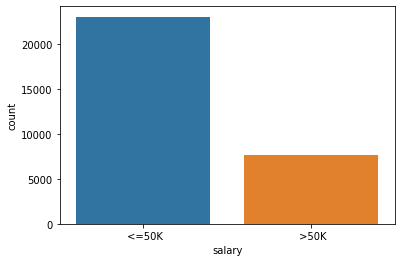

In [17]:
sal_stat = sns.countplot(data2.salary)
print("This show 75% of people's salary is less than 50k")

people with are 20-45 age are high in frequency


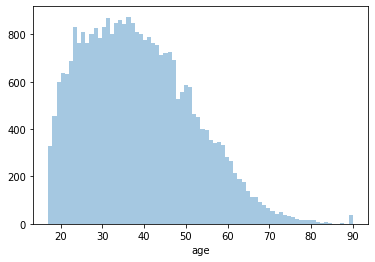

In [18]:
sns.distplot(data2.age, bins = 74, kde = False)
print("people with are 20-45 age are high in frequency")

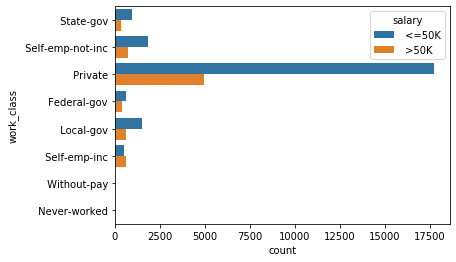

In [19]:
# work_class vs salary status
sns.countplot(y = 'work_class', data = data, hue = 'salary')

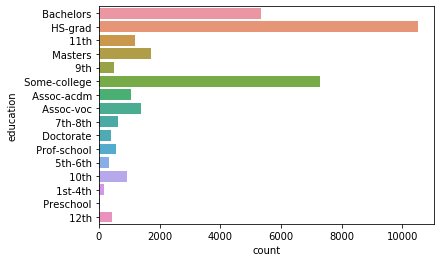

In [20]:
# education vs salary status
# crosstable as well as bargraph
sns.countplot(y = 'education', data = data)

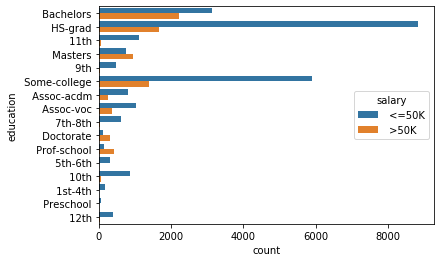

In [21]:
sns.countplot(y = 'education', data = data, hue = 'salary')

In [22]:
temp = pd.crosstab(index = data.education,
                  columns = data.salary,
                  margins = True,
                  dropna = True,
                  normalize = 'index')
temp

salary,<=50K,>50K
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


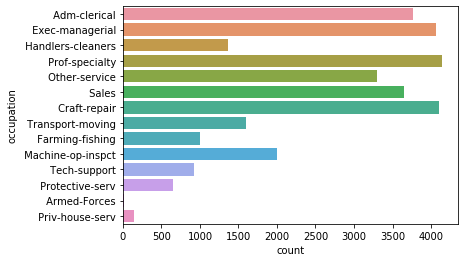

In [23]:
# occupation vs salary status
# crosstable as well as bargraph
sns.countplot(y = "occupation", data = data)

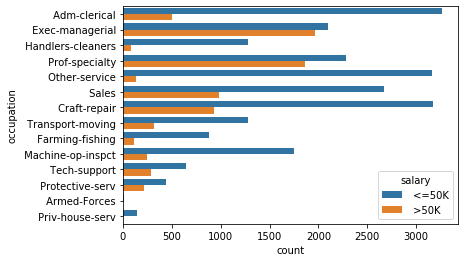

In [24]:
sns.countplot(y = 'occupation', data = data, hue = 'salary')

In [25]:
temp = pd.crosstab(index = data.occupation,
                  columns = data.salary,
                  margins = True,
                  dropna = True,
                  normalize = 'index')
temp

salary,<=50K,>50K
occupation,,
Adm-clerical,0.865517,0.134483
Armed-Forces,0.888889,0.111111
Craft-repair,0.773359,0.226641
Exec-managerial,0.515986,0.484014
Farming-fishing,0.884306,0.115694
Handlers-cleaners,0.937226,0.062774
Machine-op-inspct,0.875125,0.124875
Other-service,0.958422,0.041578
Priv-house-serv,0.993289,0.006711


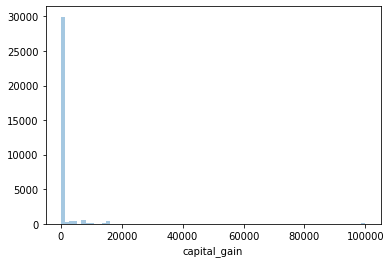

In [26]:
# capital_gain's bargraph
sns.distplot(data.capital_gain, kde = False, bins = 74)

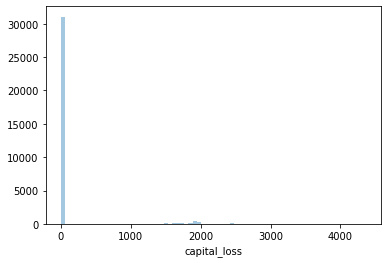

In [27]:
# caoital_loss's bargraph
sns.distplot(data.capital_loss, kde = False, bins = 74)

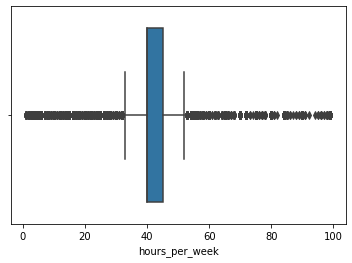

In [28]:
# hoursperweek vs salary status
# boxplot
sns.boxplot(x = data.hours_per_week, hue = data['salary'])

# Logistic Regression

In [29]:
# The data's salary value contain 2 values " <=50K" and " >50K", which can be converted to 0 and 1
data2.salary = data2.salary.map({' <=50K':0, ' >50K':1})
print(data2.salary.value_counts())

0    23068
1     7650
Name: salary, dtype: int64


/home/ketan/.local/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
new_data = pd.get_dummies(data2, drop_first = True)

In [31]:
columns_list = list(new_data.columns)
columns_list[-5:]

['native_country_ Thailand',
 'native_country_ Trinadad&Tobago',
 'native_country_ United-States',
 'native_country_ Vietnam',
 'native_country_ Yugoslavia']

In [32]:
features = list(set(columns_list)-set(['salary']))
features[-5:]

['native_country_ Haiti',
 'native_country_ Yugoslavia',
 'native_country_ Iran',
 'occupation_ Protective-serv',
 'work_class_ State-gov']

In [33]:
y = new_data.salary.values
y

array([0, 0, 0, ..., 0, 0, 1])

In [34]:
x = new_data[features].values
x

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, sep = '\n')

(24574, 96)
(6144, 96)
(24574,)
(6144,)


In [36]:
logistic = LogisticRegression()

In [37]:
logistic.fit(x_train, y_train)

/home/ketan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
logistic.coef_

array([[ 4.09339826e-06,  1.20565841e-03, -7.65346635e-06,
        -1.23394127e-04,  3.41831694e-06, -2.40685121e-06,
         9.26712356e-04,  6.53238263e-04,  2.85413485e-05,
        -3.31655712e-06, -1.46156803e-04, -2.47716954e-05,
         3.82225983e-03, -1.94904123e-04,  1.45506891e-05,
        -5.93866632e-06,  9.69852306e-04, -1.74892263e-03,
        -4.62371407e-04, -7.34776149e-06, -4.04790361e-06,
        -9.26829392e-04, -1.43444200e-04, -7.57433579e-07,
        -2.96865854e-06, -6.13267001e-05,  4.36316676e-04,
        -1.54202214e-03, -1.44280003e-04,  2.70606227e-06,
         2.56607351e-04, -1.03094210e-05, -1.98562604e-03,
         1.37204957e-05, -6.43306637e-06, -8.19225063e-06,
        -4.01613353e-03, -2.70227080e-04,  1.60659432e-05,
        -6.71071551e-06, -4.99847184e-05, -2.86148350e-05,
        -4.52920786e-05, -1.13161006e-02, -7.99685575e-06,
         1.01890139e-03, -3.44414244e-06,  1.28115124e-05,
         3.44302704e-04, -3.93921096e-04, -2.25067626e-0

In [39]:
logistic.intercept_

array([-0.00179739])

In [40]:
predictions = logistic.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[4422,  173],
       [1159,  390]])

In [42]:
acc = accuracy_score(y_test, predictions)
acc

0.783203125

In [44]:
print("misclassified value", (y_test != predictions).sum())

misclassified value 1332


# Logistic regression model - without insignificant variables

In [45]:
data2.salary = data.salary.map({' <=50K':0, ' >50K':1})
data2.salary

/home/ketan/.local/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 30718, dtype: int64

In [47]:
columns_list

['age',
 'fn',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'salary',
 'work_class_ Local-gov',
 'work_class_ Private',
 'work_class_ Self-emp-inc',
 'work_class_ Self-emp-not-inc',
 'work_class_ State-gov',
 'work_class_ Without-pay',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ M

In [52]:
cols = ['gender', 'native_country', 'race', 'work_class', 'fn', 'education_num']
new_data = data2.drop(cols, axis = 1)

In [53]:
new_data = pd.get_dummies(new_data, drop_first = True)

In [54]:
columns_list = list(new_data.columns)
columns_list

['age',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'salary',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-suppor

In [56]:
features = list(set(columns_list)- set(["salary"]))
features

['hours_per_week',
 'occupation_ Exec-managerial',
 'education_ Bachelors',
 'education_ 12th',
 'occupation_ Prof-specialty',
 'education_ Masters',
 'capital_gain',
 'occupation_ Tech-support',
 'education_ 11th',
 'education_ Preschool',
 'relationship_ Not-in-family',
 'occupation_ Other-service',
 'education_ 9th',
 'marital_status_ Married-civ-spouse',
 'education_ 5th-6th',
 'marital_status_ Married-spouse-absent',
 'education_ Prof-school',
 'marital_status_ Widowed',
 'education_ 7th-8th',
 'marital_status_ Never-married',
 'education_ HS-grad',
 'occupation_ Craft-repair',
 'occupation_ Handlers-cleaners',
 'capital_loss',
 'marital_status_ Separated',
 'occupation_ Machine-op-inspct',
 'occupation_ Transport-moving',
 'marital_status_ Married-AF-spouse',
 'occupation_ Armed-Forces',
 'education_ Assoc-acdm',
 'education_ Some-college',
 'occupation_ Sales',
 'relationship_ Unmarried',
 'education_ 1st-4th',
 'occupation_ Priv-house-serv',
 'relationship_ Wife',
 'education_ 

In [58]:
y = new_data.salary.values
y

array([0, 0, 0, ..., 0, 0, 1])

In [59]:
x = new_data[features].values

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 8)

In [61]:
logistic = LogisticRegression()

In [62]:
logistic.fit(x_train, y_train)

/home/ketan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
prediction = logistic.predict(x_test)

In [66]:
acc = accuracy_score(y_test, prediction)
acc

0.849609375